# QOSF Mentorship Program Screening Task

For convenience, this task was built and run in Google Colab (sorry IBM!), then uploaded to Github for task completion. Qiskit is not installed by default in the Colab environment, so to start we'll import Qiskit. Comment out the line below if you already have Qiskit installed in your environment. I've hidden the cell output because no one needs to see that.

In [ ]:
!pip install qiskit[visualization]

## Task Instructions

The bit-flip code and the sign-flip code (you can find a description of both here) are two very simple circuits able to detect and fix the bit-flip and the sign-flip errors, respectively.
Build the following simple circuit to prepare the Bell state: 
```
|0> ----[H]----@----
               |
|0> ----------(+)---
```
*(Note: That's a Hadamard Gate and a CNOT Gate)*

Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. By error gate we mean that with a certain probability (that you can decide but must be non-zero for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error).

Encode each of the two qubits with a sign-flip or a bit-flip code, in such a way that all the possible choices for the error gates described in 2), occurring on the logical qubits, can be detected and fixed. Motivate your choice. This is the most non-trivial part of the problem, so do it with a lot of care!

Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.


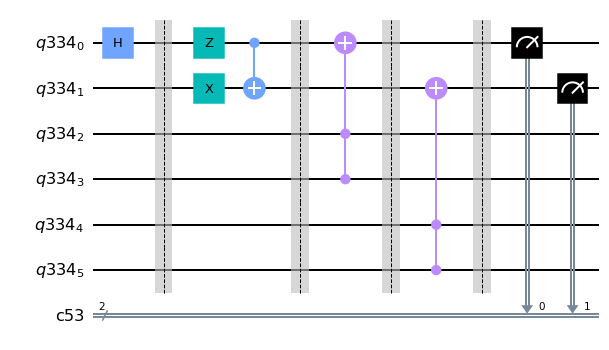

In [113]:
from qiskit import *
import numpy
from qiskit.visualization import plot_bloch_multivector, plot_histogram
%matplotlib inline

simulator = Aer.get_backend('qasm_simulator')

# We need a register with 6 qubits to perform our error correction
qregister = QuantumRegister(6)

# Since we're trying to correct errors on two quantum circuits, we need to 
# measure to two classical bits
cregister = ClassicalRegister(2)

circuit = QuantumCircuit(qregister, cregister)

# Here's where we build our circuit!
#
# I use .barrier() to help me keep the visualizations clean

# Initialize the first steps of the task
circuit.h(0)
circuit.barrier()
circuit.z(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.barrier()

# # Here, we correct the first qubit's state back to it's initialized state
# circuit.cx(0, 2)
# circuit.cx(0, 3)
circuit.ccx(3, 2, 0)
circuit.barrier()

# Now we correct the second back to it's initialized state
# circuit.cx(1, 4)
# circuit.cx(1, 5)
circuit.ccx(5, 4, 1)
circuit.barrier()

# Measure both target qubits (0 and 1) to classical bits
circuit.measure([0, 1], [0, 1])

# Et, viola!
circuit.draw(output='mpl')

## Testing

When we exectue the job, we get a 100% probability of measuring the initial state. We ran the circuit and measured 1,000 times.

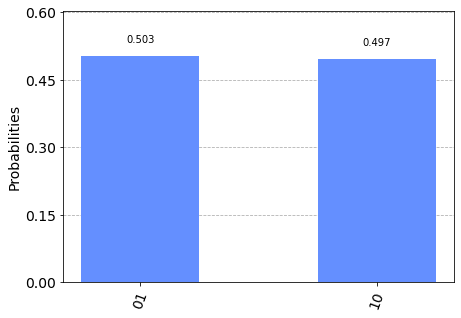

In [114]:
job = execute(circuit, simulator, shots=1000)

counts = job.result().get_counts()

plot_histogram(counts)

## Intuition

I believe the Toffoli gate is what made this circuit's error correction possible in such a concise manner. Returning to a Hadamard state would be relatively simple regardless of its initial state, but returning the circuit to its initial state after a Hadamard, sign flip error, and bit flip errors were introduced to the system it becomes more difficult. The whole circuit works together to return the system back to its initial state of `|00>`.

Here are some modification that can be made to the circuit to yield different results:

1.   Switching the X and Z gates yields the same `|00>` result, meaning that regardless of the noise it can be corrected.
2.   Removing the Toffoli gates yields an ~equal probability of `|01>` and `|10>`
3.   As well, removing the two CNOT gates before their respective Toffoli gates yields an ~equal probability of `|01>` and `|10>`

I need to explore a bit more to determine which gate(s) would be needed to operate similar to the Toffoli when the qubit state initialization is `|1>`. The circuit above will only work with qubits initialized to `|0>`.

